# Decision Trees

## Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [ ]:
df = pd.read_csv("/content/penguins_size.csv")

In [ ]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## EDA

### Missing Data

Recall the purpose is to create a model for future use, so data points missing crucial information won't help in this task, especially since for future data points we will assume the research will grab the relevant feature information.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [ ]:
# What percentage are we dropping?
100*(10/344)

2.9069767441860463

In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [ ]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [ ]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [ ]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [ ]:
df = df[df['sex']!='.']

## Visualization

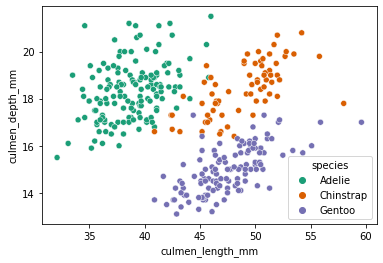

In [ ]:
sns.scatterplot(x='culmen_length_mm',y='culmen_depth_mm',data=df,hue='species',palette='Dark2')

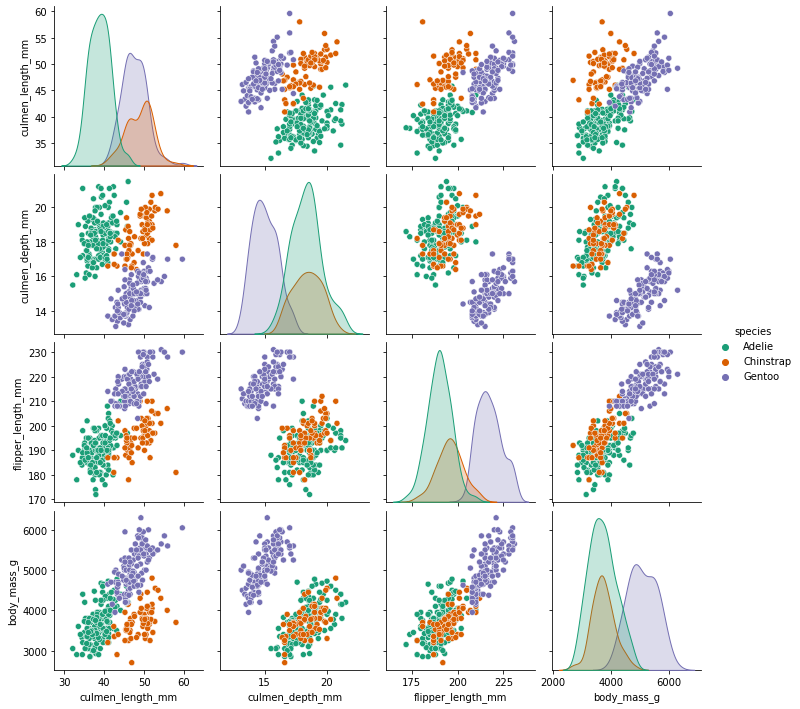

In [ ]:
sns.pairplot(df,hue='species',palette='Dark2')

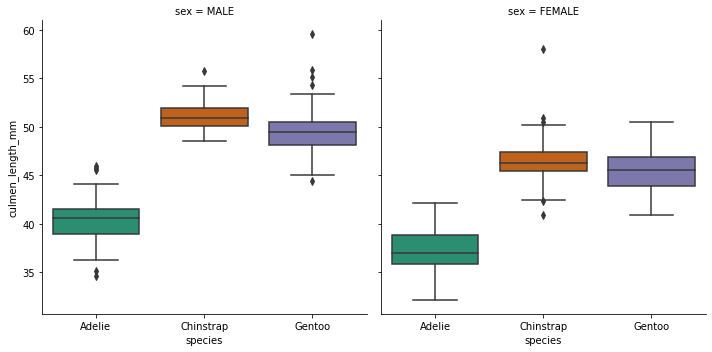

In [ ]:
sns.catplot(x='species',y='culmen_length_mm',data=df,kind='box',col='sex',palette='Dark2')

## Feature Engineering

In [ ]:
pd.get_dummies(df)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,1,0,0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,1,0,0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,1,0,0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,1,0,0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,1,1,0,0,1,0
340,46.8,14.3,215.0,4850.0,0,0,1,1,0,0,1,0
341,50.4,15.7,222.0,5750.0,0,0,1,1,0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,1,1,0,0,1,0


In [ ]:
pd.get_dummies(df.drop('species',axis=1),drop_first=True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


## Train | Test Split

In [ ]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Decision Tree Classifier

## Default Hyperparameters

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
base_pred = model.predict(X_test)
base_pred_train = model.predict(X_train)

## Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score

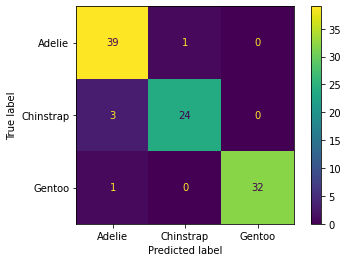

In [ ]:
plot_confusion_matrix(model,X_test,y_test)

In [ ]:
accuracy_score(y_test,base_pred)

0.95

In [ ]:
accuracy_score(y_train,base_pred_train)

1.0

In [ ]:
model.feature_importances_

array([0.34035881, 0.04582245, 0.57575804, 0.        , 0.03806069,
       0.        , 0.        ])

In [ ]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
culmen_length_mm,0.340359
culmen_depth_mm,0.045822
flipper_length_mm,0.575758
body_mass_g,0.000000
island_Dream,0.038061
island_Torgersen,0.000000
sex_MALE,0.000000


## Visualize the Tree

This function is fairly new, you may want to review the online docs:

Online Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

In [ ]:
from sklearn.tree import plot_tree

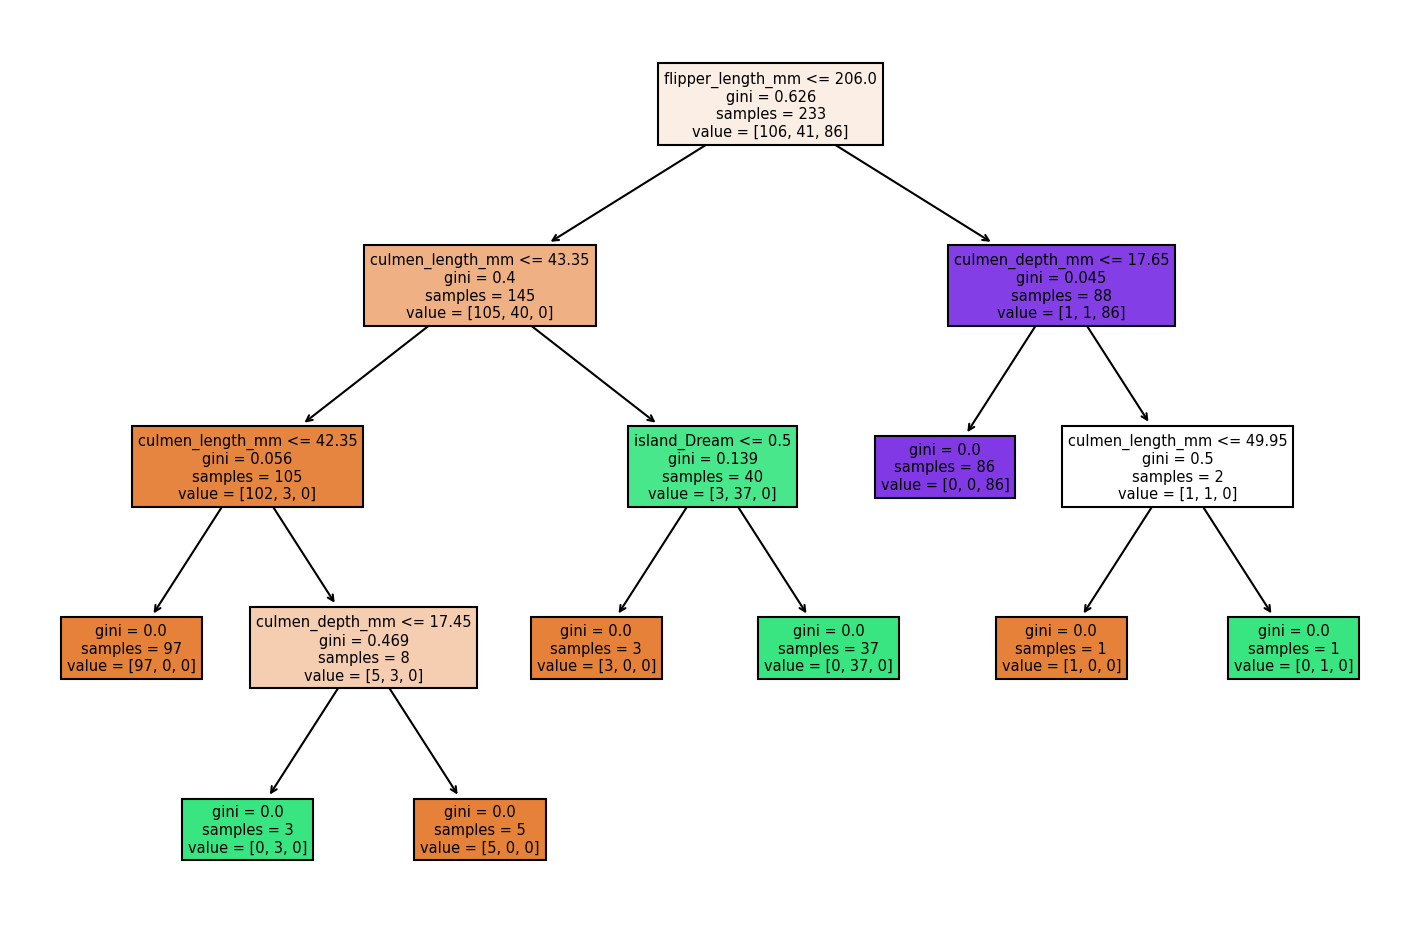

In [ ]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model,filled=True,feature_names=X.columns);

## Pruning

In [ ]:
X = pd.get_dummies(df.drop(['species','body_mass_g'],axis=1),drop_first=True)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
path=model.cost_complexity_pruning_path(X_train,y_train)
alphas = path['ccp_alphas']
alphas

array([0.        , 0.00429185, 0.01250766, 0.01258291, 0.02381974,
       0.19979598, 0.36033   ])

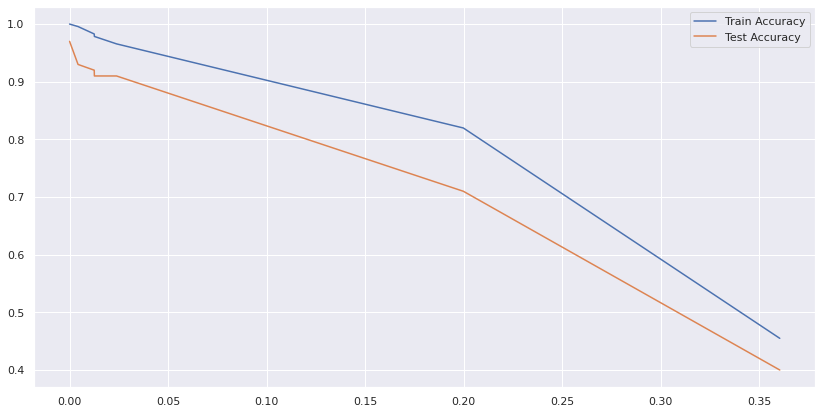

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_train,accuracy_test=[],[]

for i in alphas :
  tree = DecisionTreeClassifier(criterion="gini",ccp_alpha=i)

  tree.fit(X_train,y_train)
  y_train_pred = tree.predict(X_train)
  y_test_pred = tree.predict(X_test)

  accuracy_train.append(accuracy_score(y_train,y_train_pred))
  accuracy_test.append(accuracy_score(y_test,y_test_pred))


sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=accuracy_train,x=alphas, label='Train Accuracy')
sns.lineplot(y=accuracy_test,x=alphas, label='Test Accuracy')
#plt.xticks(ticks=np.arrange(0.00,0.25,0.01))
plt.show()


##Pruning from Doct Sklearn

In [ ]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

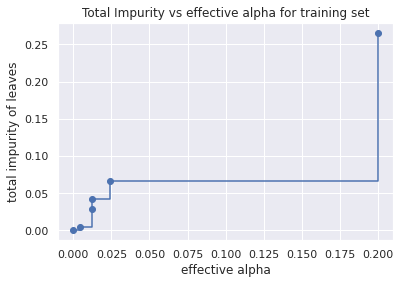

In [ ]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.36032999924761183


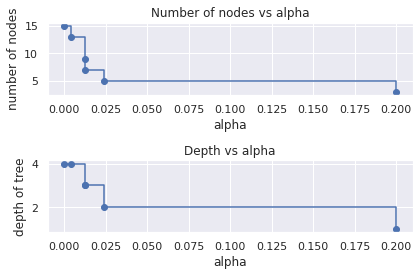

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

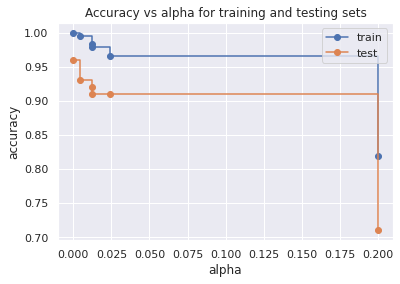

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()


# DecisionTree Regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [ ]:
boston = datasets.load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['target'] = boston.target
df.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
400,25.04610,0.0,18.10,0.0,0.693,5.987,100.0,1.5888,24.0,666.0,20.2,396.90,26.77,5.6
114,0.14231,0.0,10.01,0.0,0.547,6.254,84.2,2.2565,6.0,432.0,17.8,388.74,10.45,18.5
168,2.30040,0.0,19.58,0.0,0.605,6.319,96.1,2.1000,5.0,403.0,14.7,297.09,11.10,23.8
91,0.03932,0.0,3.41,0.0,0.489,6.405,73.9,3.0921,2.0,270.0,17.8,393.55,8.20,22.0
435,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27,13.4


In [ ]:
#Lets create feature matrix X  and y labels
X_boston = df.drop('target', axis=1)
y_boston = df['target']

In [ ]:
X_train_boston,X_test_boston, y_train_boston, y_test_boston = train_test_split(X_boston, y_boston, test_size= 0.2, random_state= 1)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(min_samples_leaf=23)
dtr.fit(X_train_boston ,y_train_boston)

DecisionTreeRegressor(min_samples_leaf=23)

In [ ]:
from sklearn.metrics import mean_squared_error 
y_pred_boston = dtr.predict(X_test_boston)
np.sqrt(mean_squared_error(y_test_boston, y_pred_boston))

4.141771694639578

In [ ]:
y_pred_train_boston = dtr.predict(X_train_boston)
np.sqrt(mean_squared_error(y_train_boston, y_pred_train_boston))

3.917704540910113

In [ ]:
path=dtr.cost_complexity_pruning_path(X_train_boston,y_train_boston)
alphas = path['ccp_alphas']

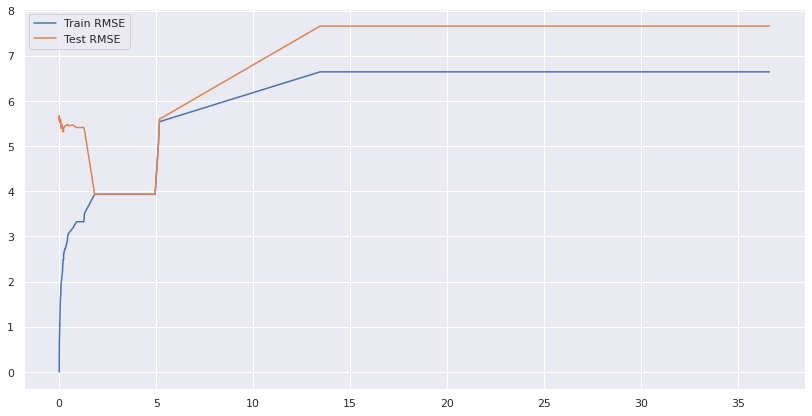

In [ ]:
rmse_train,rmse_test=[],[]

for i in alphas :
  tree = DecisionTreeRegressor(random_state= 1,ccp_alpha=i)

  tree.fit(X_train_boston,y_train_boston)
  y_train_pred_boston = tree.predict(X_train_boston)
  y_test_pred_boston = tree.predict(X_test_boston)

  rmse_train.append(np.sqrt(mean_squared_error(y_train_boston,y_train_pred_boston)))
  rmse_test.append(np.sqrt(mean_squared_error(y_test_boston,y_test_pred_boston)))


sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=rmse_train,x=alphas, label='Train RMSE')
sns.lineplot(y=rmse_test,x=alphas, label='Test RMSE')
#plt.xticks(ticks=np.arrange(0.00,0.25,0.01))
#plt.xlim(right=1.4)
#plt.xlim(left=1)
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state= 1,ccp_alpha=1.31)
dtr.fit(X_train_boston ,y_train_boston)

DecisionTreeRegressor(ccp_alpha=1.31, random_state=1)

In [ ]:
from sklearn.metrics import mean_squared_error 
y_pred_dtr = dtr.predict(X_test_boston)
np.sqrt(mean_squared_error(y_test_boston, y_pred_dtr))


3.7479475414920653

In [ ]:
y_pred_train_dtr = dtr.predict(X_train_boston)
np.sqrt(mean_squared_error(y_train_boston, y_pred_train_dtr))

3.6936743885396286

In [ ]:
df['target'].mean()

22.532806324110677

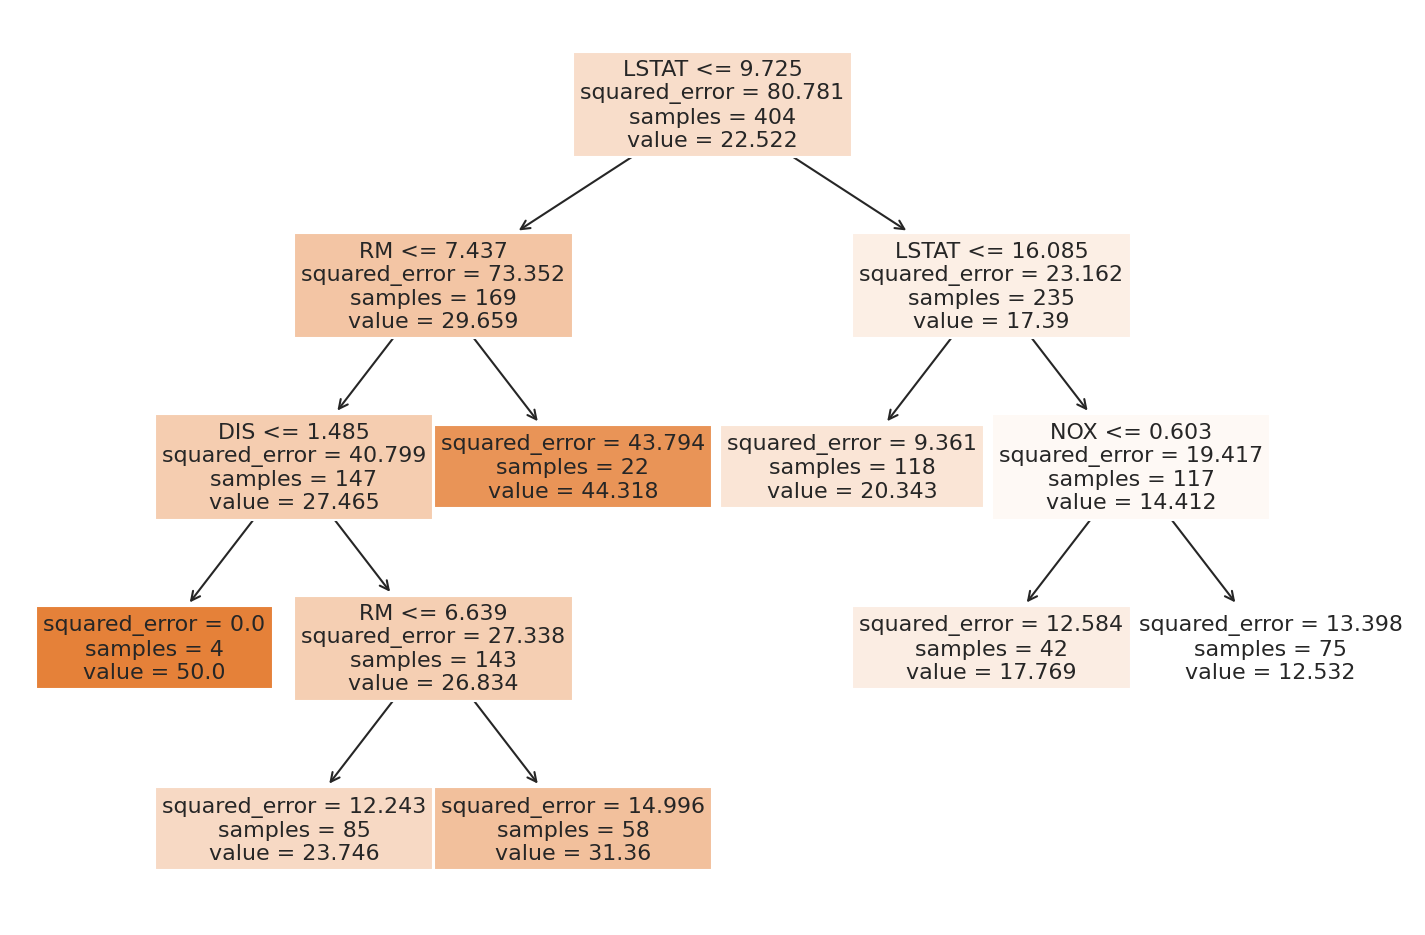

In [ ]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(dtr,filled=True,feature_names=X_boston.columns);

In [ ]:
dtr.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.02722369,
       0.27408953, 0.        , 0.07698747, 0.        , 0.        ,
       0.        , 0.        , 0.62169931])

#Ensamble Learning

##Bagging Clasifiers

In [ ]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(n_estimators=20)

In [ ]:
bag_clf.fit(X_train,y_train)

BaggingClassifier(n_estimators=20)

In [ ]:
bag_clf_pred = bag_clf.predict(X_test)
bag_clf_pred_train = bag_clf.predict(X_train)

In [ ]:
print(accuracy_score(y_test,bag_clf_pred))
print(accuracy_score(y_train,bag_clf_pred_train))

0.93
1.0


## Bagging Regressor

In [ ]:
from sklearn.ensemble import BaggingRegressor
bag_reg = BaggingRegressor(n_estimators=20)

In [ ]:
bag_reg.fit(X_train_boston ,y_train_boston)
y_pred_bagregr = bag_reg.predict(X_test_boston)
np.sqrt(mean_squared_error(y_test_boston,y_pred_bagregr ))

2.8175620893692788

In [ ]:
y_pred_bagregr_train = bag_reg.predict(X_train_boston)
np.sqrt(mean_squared_error(y_train_boston,y_pred_bagregr_train))

1.42975732293115

##Bagging Clasifiers with Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_clf = BaggingClassifier(n_estimators=20,base_estimator=GaussianNB())

In [ ]:
nb_clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=GaussianNB(), n_estimators=20)

In [ ]:
nb_clf_pred = nb_clf.predict(X_test)
nb_clf_pred_train = nb_clf.predict(X_train)

In [ ]:
print(accuracy_score(y_test,nb_clf_pred))
print(accuracy_score(y_train,nb_clf_pred_train))

0.83
0.8154506437768241


##Voting Classifiers

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

clf3 = GaussianNB()
clf1 = LogisticRegression()
clf2 =RandomForestClassifier()

eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)])

In [ ]:
eclf1 = eclf1.fit(X_train, y_train)

In [ ]:
eclf1_pred = eclf1.predict(X_test)
eclf1_pred_train = eclf1.predict(X_train)

In [ ]:
print(accuracy_score(y_test,eclf1_pred))
print(accuracy_score(y_train,eclf1_pred_train))

0.98
1.0


##Random Forest Clasifiers

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randf = RandomForestClassifier(n_estimators=20,oob_score=True)

In [ ]:
randf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20, oob_score=True)

In [ ]:
randf_pred = randf.predict(X_test)
randf_pred_train = randf.predict(X_train)

In [ ]:
print(accuracy_score(y_test,randf_pred))
print(accuracy_score(y_train,randf_pred_train))

0.98
1.0


In [ ]:
randf.oob_score_

0.9828326180257511

In [ ]:
randf.feature_importances_

array([0.39472617, 0.19327358, 0.23987235, 0.12438841, 0.03685437,
       0.01088512])

##RandomForest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
randf_reg = RandomForestRegressor(oob_score=True)

In [ ]:
randf_reg.fit(X_train_boston ,y_train_boston)

RandomForestRegressor(oob_score=True)

In [ ]:
y_pred_randf_reg = randf_reg.predict(X_test_boston)
np.sqrt(mean_squared_error(y_test_boston, y_pred_randf_reg))

2.981953597040363

In [ ]:
y_pred_train_randf_reg = randf_reg.predict(X_train_boston)
np.sqrt(mean_squared_error(y_train_boston, y_pred_train_randf_reg))

1.2054919479754573

In [ ]:
randf_reg.oob_score_

0.8635860596238976

##AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=20)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=20)

In [ ]:
ada_clf_pred = ada_clf.predict(X_test)
ada_clf_pred_train = ada_clf.predict(X_train)

In [ ]:
print(accuracy_score(y_test,ada_clf_pred))
print(accuracy_score(y_train,ada_clf_pred_train))

0.96
0.9914163090128756


##Adaboost with Logreg base etimator

In [ ]:
from sklearn.linear_model import LogisticRegression
ada_logreg = AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=20)
ada_logreg.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=20)

In [ ]:
ada_logreg_pred = ada_logreg.predict(X_test)
ada_logreg_pred_train = ada_logreg.predict(X_train)

In [ ]:
print(accuracy_score(y_test,ada_logreg_pred))
print(accuracy_score(y_train,ada_logreg_pred_train))

0.98
0.9871244635193133


##Adaboost Regression

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg = AdaBoostRegressor(n_estimators=20)
ada_reg.fit(X_train_boston, y_train_boston)

AdaBoostRegressor(n_estimators=20)

In [ ]:
ada_reg_pred = ada_reg.predict(X_test_boston)
ada_reg_pred_train = ada_reg.predict(X_train_boston)

In [ ]:
print(np.sqrt(mean_squared_error(y_test_boston, ada_reg_pred)))
print(np.sqrt(mean_squared_error(y_train_boston, ada_reg_pred_train)))

3.808315153105844
2.8438377275335376


## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb_clf = GradientBoostingClassifier(n_estimators=20)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=20)

In [ ]:
gb_pred = gb_clf.predict(X_test)
gb_pred_train = gb_clf.predict(X_train)

In [ ]:
print(accuracy_score(y_test,gb_pred))
print(accuracy_score(y_train,gb_pred_train))

0.98
0.9957081545064378


##Xgboost Clasifiers

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
xgb_clf_pred = xgb_clf.predict(X_test)
xgb_clf_pred_train = xgb_clf.predict(X_train)

In [ ]:
print(accuracy_score(y_test,xgb_clf_pred))
print(accuracy_score(y_train,xgb_clf_pred_train))

0.98
1.0


Param tuning guide :
https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

In [ ]:
xgb_clf = XGBClassifier(gamma=0.25,max_depth=2,learning_rate=0.1,reg_lambda=10)
xgb_clf.fit(X_train, y_train)

XGBClassifier(gamma=0.25, max_depth=2, objective='multi:softprob',
              reg_lambda=10)

In [ ]:
xgb_clf_pred = xgb_clf.predict(X_test)
xgb_clf_pred_train = xgb_clf.predict(X_train)

In [ ]:
print(accuracy_score(y_test,xgb_clf_pred))
print(accuracy_score(y_train,xgb_clf_pred_train))

0.98
0.9957081545064378


##Xgboost Regression

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgbreg = XGBRegressor()
xgbreg.fit(X_train_boston, y_train_boston)

[04:33:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
xgbreg_pred = xgbreg.predict(X_test_boston)
xgbreg_pred_train = xgbreg.predict(X_train_boston)

In [ ]:
print(np.sqrt(mean_squared_error(y_test_boston, xgbreg_pred)))
print(np.sqrt(mean_squared_error(y_train_boston, xgbreg_pred_train)))

2.818446896358722
1.4241936102698567


Perhaps the most commonly configured hyperparameters are the following:

n_estimators: The number of trees in the ensemble, often increased until no further improvements are seen.

max_depth: The maximum depth of each tree, often values are between 1 and 10.

eta: The learning rate used to weight each model, often set to small values such as 0.3, 0.1, 0.01, or smaller.

subsample: The number of samples (rows) used in each tree, set to a value between 0 and 1, often 1.0 to use all samples.

colsample_bytree: Number of features (columns) used in each tree, set to a value between 0 and 1, often 1.0 to use all features.

In [ ]:
xgbmodel = XGBRegressor(gamma=0.25,max_depth=1,learning_rate=0.1,reg_lambda=10,n_estimators=100)

In [ ]:
xgbmodel.fit(X_train_boston, y_train_boston,early_stopping_rounds=10,eval_metric='rmse',eval_set=[(X_train_boston, y_train_boston)],verbose=True)

[07:36:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:21.7133
Will train until validation_0-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:19.8548
[2]	validation_0-rmse:18.1838
[3]	validation_0-rmse:16.6904
[4]	validation_0-rmse:15.3513
[5]	validation_0-rmse:14.1509
[6]	validation_0-rmse:13.0741
[7]	validation_0-rmse:12.1113
[8]	validation_0-rmse:11.2506
[9]	validation_0-rmse:10.489
[10]	validation_0-rmse:9.805
[11]	validation_0-rmse:9.19321
[12]	validation_0-rmse:8.65569
[13]	validation_0-rmse:8.17181
[14]	validation_0-rmse:7.74029
[15]	validation_0-rmse:7.36122
[16]	validation_0-rmse:7.02462
[17]	validation_0-rmse:6.72851
[18]	validation_0-rmse:6.4628
[19]	validation_0-rmse:6.22922
[20]	validation_0-rmse:6.01847
[21]	validation_0-rmse:5.82923
[22]	validation_0-rmse:5.66101
[23]	validation_0-rmse:5.51078
[24]	validation_0-rmse:5.37669
[25]	validation_0-rmse:5.25583
[26]	validation_

XGBRegressor(gamma=0.25, max_depth=1, reg_lambda=10)

In [ ]:
xgbmodel_pred = xgbmodel.predict(X_test_boston)
xgbmodel_pred_train = xgbmodel.predict(X_train_boston)

In [ ]:
print(np.sqrt(mean_squared_error(y_test_boston, xgbmodel_pred)))
print(np.sqrt(mean_squared_error(y_train_boston, xgbmodel_pred_train)))

3.725286787669945
3.5346292251500393


## Random Forest Imputer & KNN Imputer

In [ ]:
!pip install missingpy
!pip install miceforest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49 kB 4.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 1.5 MB/s 
     |████████████████████████████████| 2.6 MB 16.7 MB/s 
     |████████████████████████████████| 2.0 MB 40.3 MB/s 
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import miceforest as mf
import random
import sklearn.neighbors._base 
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest
from sklearn.impute import KNNImputer

In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
df2 = pd.concat(fetch_california_housing(return_X_y=True, as_frame=True),axis=1)
dt2 = df2.copy() #created a copy

In [ ]:
df2.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df2.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [ ]:
r1 = random.sample(range(len(df2)),36)
r2 = random.sample(range(len(df2)),34)
r3 = random.sample(range(len(df2)),37)
r4 = random.sample(range(len(df2)),30)
df2['AveRooms'] = [val if i not in r1 else np.nan for i, val in enumerate(dt2['AveRooms'])]
df2['HouseAge'] = [val if i not in r2 else np.nan for i, val in enumerate(dt2['HouseAge'])]
df2['MedHouseVal'] = [val if i not in r3 else np.nan for i, val in enumerate(dt2['MedHouseVal'])]
df2['Latitude'] =    [val if i not in r4 else np.nan for i, val in enumerate(dt2['Latitude'])]

In [ ]:
df2.isnull().sum()

MedInc          0
HouseAge       34
AveRooms       36
AveBedrms       0
Population      0
AveOccup        0
Latitude       30
Longitude       0
MedHouseVal    37
dtype: int64

##Imputation for Random Forest

In [ ]:
# Create kernels.  #mice forest
kernel = mf.ImputationKernel(
  data=df2,
  save_all_iterations=True,
  random_state=1343
)
# Run the MICE algorithm for 3 iterations on each of the datasets
kernel.mice(3,verbose=True) # error
#print(kernel)
completed_dataset = kernel.complete_data(dataset=1,inplace=False)

In [ ]:
imputer = MissForest() #miss forest
X_imputed = imputer.fit_transform(df2)
X_imputed = pd.DataFrame(X_imputed, columns = df2.columns).round(1)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6


##KNN Imputer

In [ ]:
impute = KNNImputer() #KNN imputation
KNNImputed = impute.fit_transform(df2)
KNNImputed = pd.DataFrame(KNNImputed, columns = df2.columns)

## Evaluation

In [ ]:
missF = np.sum(np.abs(X_imputed[df2.isnull().any(axis=1)] -         dt2[df2.isnull().any(axis=1)]))
mice =  np.sum(np.abs(completed_dataset[df2.isnull().any(axis=1)] - dt2[df2.isnull().any(axis=1)]))
Knn =   np.sum(np.abs(KNNImputed[df2.isnull().any(axis=1)] -        dt2[df2.isnull().any(axis=1)]))
for i in [missF, mice, Knn]:
    print(np.sum(i))

268.7901124191459
745.2624287860345
494.7411536437942


From the above outcome, we can have a rough estimate of the efficacy of each method, and it seems Miss Forest was able to recreate the original model better, followed by Mice Forest and then KNN.

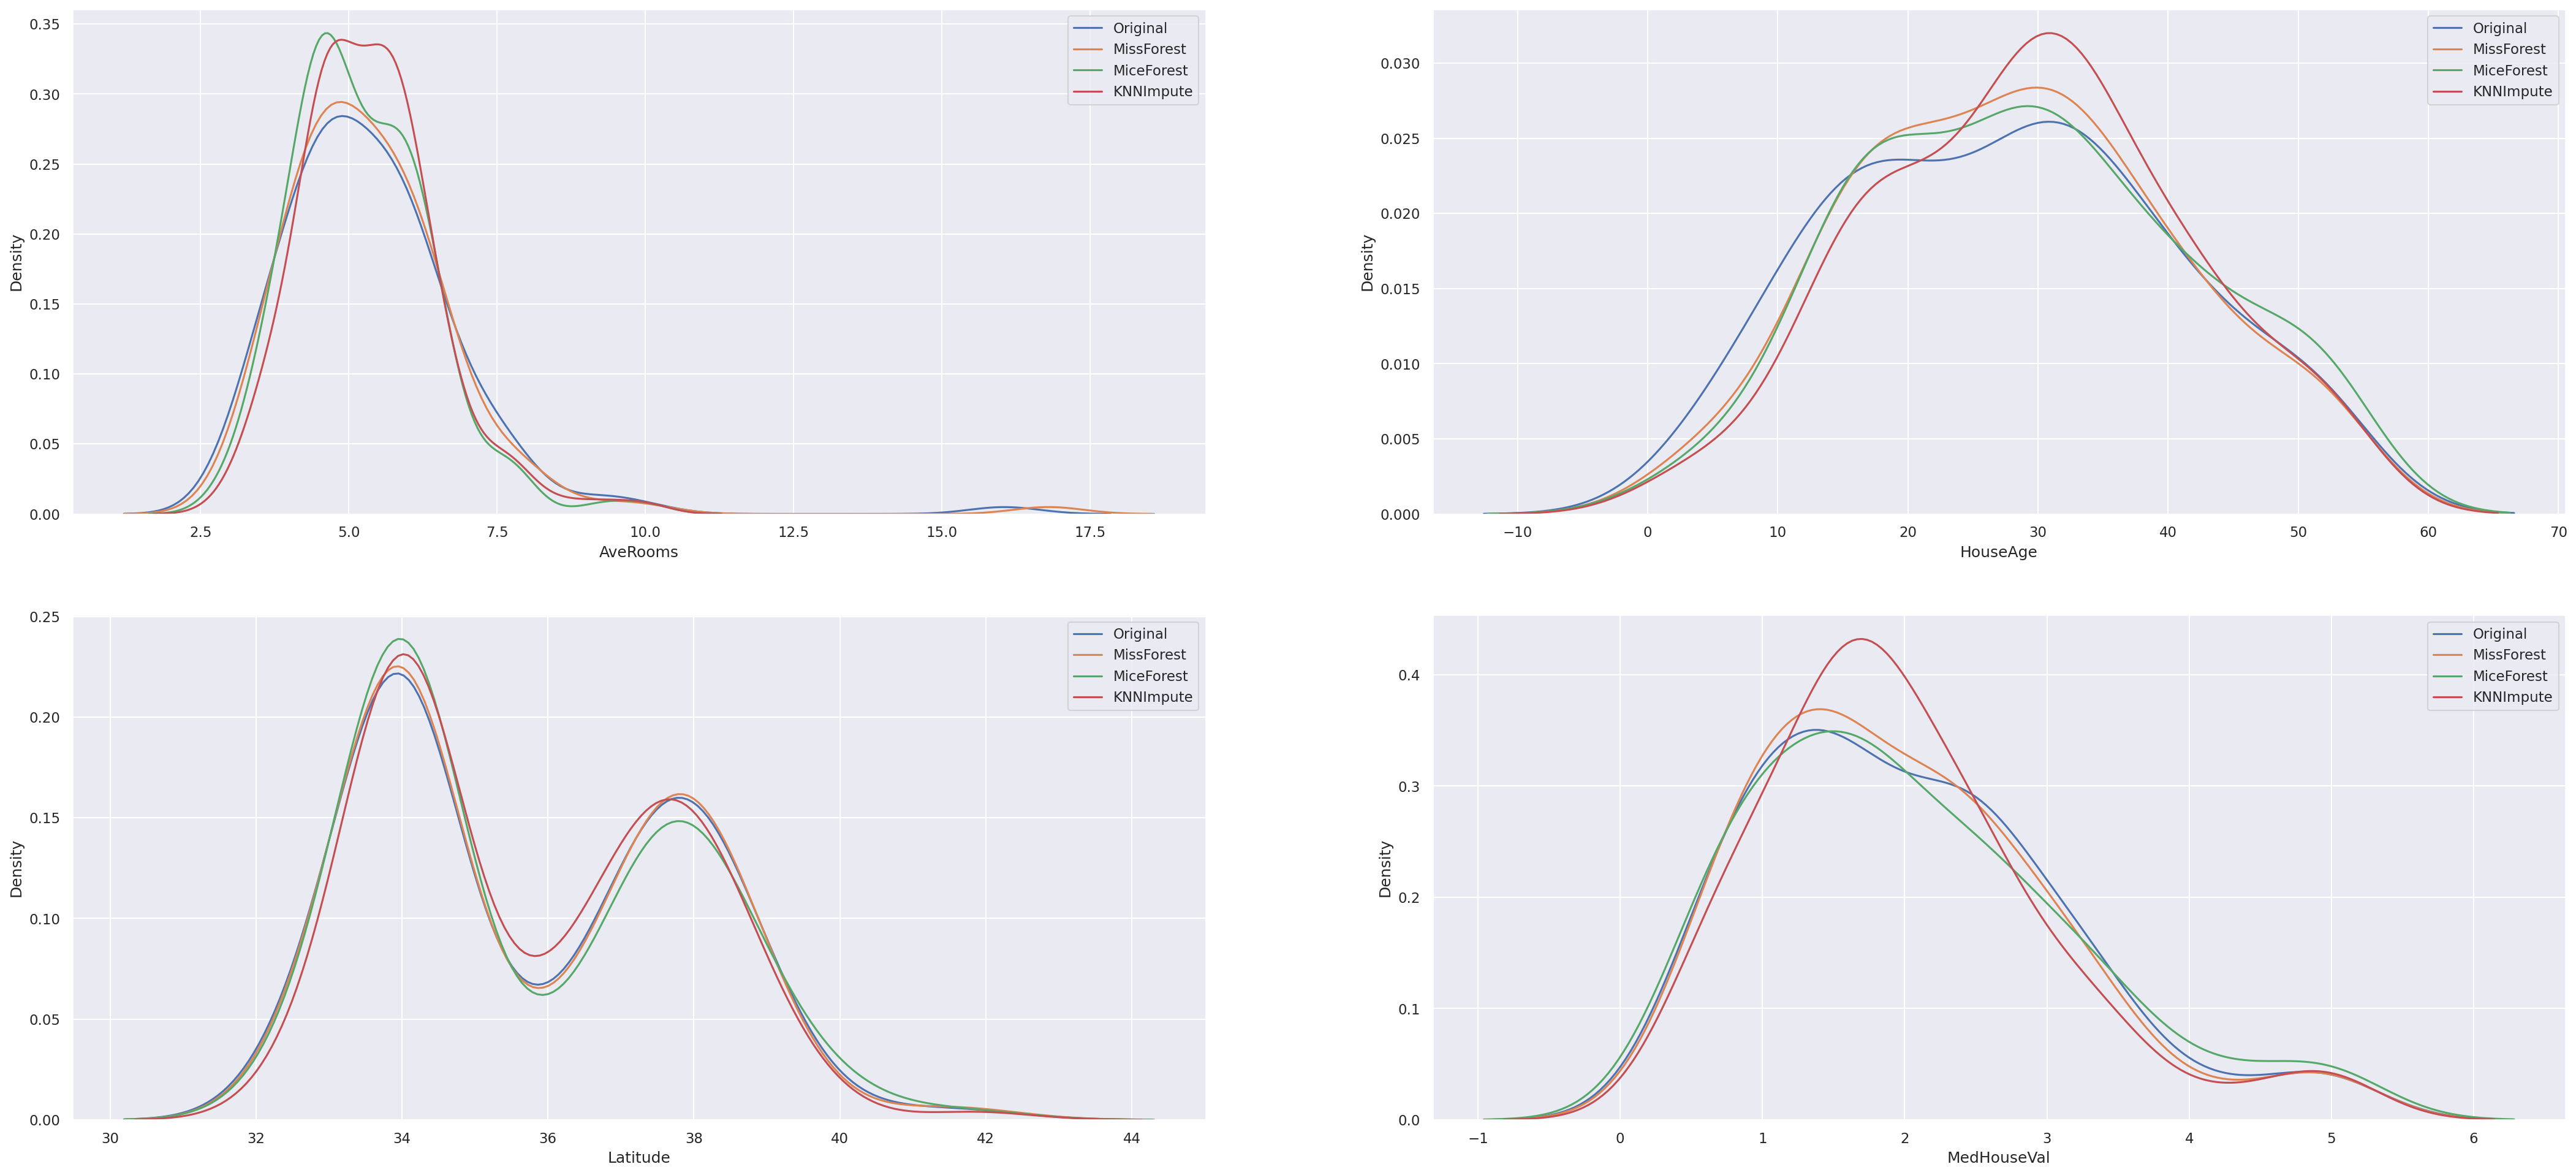

In [ ]:
sns.set(style='darkgrid')
fig,ax = plt.subplots(figsize=(35,16),nrows=2, ncols=2,dpi=150)
for col,i,j in zip(['AveRooms','HouseAge', 'Latitude','MedHouseVal'],[0,0,1,1],[0,1,0,1]):
    sns.kdeplot(x = dt2[col][df2.isnull().any(axis=1)], label= 'Original', ax=ax[i][j] )
    sns.kdeplot(x = X_imputed[col][df2.isnull().any(axis=1)], label = 'MissForest', ax=ax[i][j] )
    sns.kdeplot(x = completed_dataset[col][df2.isnull().any(axis=1)], label = 'MiceForest', ax=ax[i][j] )
    sns.kdeplot(x = KNNImputed[col][df2.isnull().any(axis=1)], label='KNNImpute',  ax=ax[i][j] )
    ax[i][j].legend()